In [46]:
# !pip install ipywidgets

In [6]:
# !python -m ipykernel install --user --name=earth-analytics-python --display-name "Python (maps)"

In [57]:
# Import libraries
import os
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
import geopandas as gpd
import earthpy as et

# Get the data & set working dir
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [58]:
# Import roads shapefile
sjer_roads_path = os.path.join("spatial-vector-lidar", 
                               "california", "madera-county-roads", 
                               "tl_2013_06039_roads.shp")

sjer_roads = gpd.read_file(sjer_roads_path)

# View data type
print(type(sjer_roads['RTTYP']))

<class 'pandas.core.series.Series'>


# Exploratory Data Analysis

In [59]:
sjer_roads.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,110454239066,N 14th St,M,S1400,"LINESTRING (-120.27227 37.11615, -120.27244 37..."
1,110454239052,N 11th St,M,S1400,"LINESTRING (-120.26788 37.11667, -120.26807 37..."
2,110454239056,N 12th St,M,S1400,"LINESTRING (-120.27053 37.11749, -120.27045 37..."
3,110454239047,N 10th St,M,S1400,"LINESTRING (-120.26703 37.11735, -120.26721 37..."
4,110454243091,N Westberry Blvd,M,S1400,"LINESTRING (-120.10122 36.96524, -120.10123 36..."


In [60]:
sjer_roads.dtypes

LINEARID      object
FULLNAME      object
RTTYP         object
MTFCC         object
geometry    geometry
dtype: object

In [61]:
# View first 5 rows
sjer_roads.columns

Index(['LINEARID', 'FULLNAME', 'RTTYP', 'MTFCC', 'geometry'], dtype='object')

In [62]:
a = sjer_roads["geometry"].iloc[0]
print(a)

LINESTRING (-120.27226700000001 37.116150999999995, -120.27244 37.116289, -120.27268300000001 37.116483999999986, -120.272955 37.11671299999999, -120.273125 37.116856999999996, -120.273304 37.11699399999999, -120.27351300000001 37.11715399999999, -120.273833 37.117419999999996, -120.274008 37.11756499999999)


In [63]:
sjer_roads['RTTYP'].unique()

array(['M', None, 'S', 'C'], dtype=object)

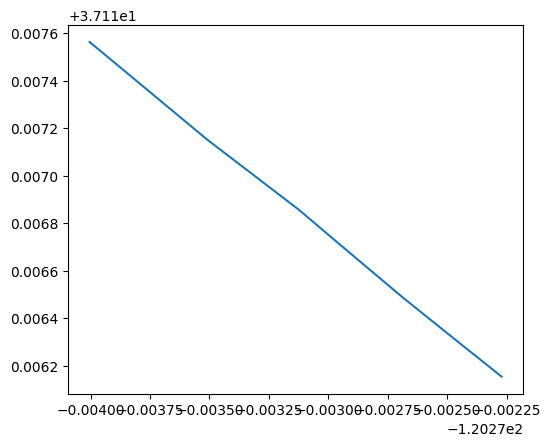

In [64]:
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt

# Create the LINESTRING geometry
coords = [(-120.272267, 37.116151), 
          (-120.27244, 37.116289), 
          (-120.272683, 37.116484), 
          (-120.272955, 37.116713), 
          (-120.273125, 37.116857), 
          (-120.273304, 37.116994), 
          (-120.273513, 37.117154), 
          (-120.273833, 37.11742), 
          (-120.274008, 37.117565)]

line = LineString(coords)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=[line])

# Plot the LINESTRING
gdf.plot()
plt.show()


In [65]:
# Save as CSV
sjer_roads.to_csv("sjer_roads.csv", index=False)

In [66]:
# View unique attributes for each road in the data
print(sjer_roads['RTTYP'].unique())

['M' None 'S' 'C']


In [67]:
# Map each value to a new value
sjer_roads['RTTYP'].replace(np.nan, 'Unknown', inplace=True)

print(sjer_roads['RTTYP'].unique())

['M' 'Unknown' 'S' 'C']


C:\Users\alifr\AppData\Local\Temp\ipykernel_15084\2933021426.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sjer_roads['RTTYP'].replace(np.nan, 'Unknown', inplace=True)


In [68]:
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load your data
# sjer_roads = gpd.read_file("path/to/your/sjer_roads.shp")

# Define the custom color palette
roadPalette = {
    'M': 'blue',
    'S': 'green',
    'C': 'purple',
    'Unknown': 'grey'
}

# Compute the full extent (bounding box) to keep the map size fixed
x_min, y_min, x_max, y_max = sjer_roads.total_bounds

# Unique road types
road_types = sjer_roads["RTTYP"].unique()

# Create a dropdown to select road type
road_selector = widgets.Dropdown(
    options=['All'] + list(road_types),
    value='All',
    description='Road Type:',
    style={'description_width': 'initial'}
)

def update_map(selected_road_type):
    fig, ax = plt.subplots(figsize=(14, 6))

    # Filter data based on selection
    if selected_road_type == "All":
        filtered_roads = sjer_roads
        color = [roadPalette.get(rt, 'grey') for rt in filtered_roads["RTTYP"]]
    else:
        filtered_roads = sjer_roads[sjer_roads["RTTYP"] == selected_road_type]
        color = roadPalette.get(selected_road_type, 'grey')

    # Plot the selected road type
    filtered_roads.plot(color=color, ax=ax, linewidth=2, legend=True)

    # Set fixed map extent (prevents zooming)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Adjust legend position
    leg = ax.get_legend()
    if leg:
        leg.set_bbox_to_anchor((1.15, 0.5))

    ax.set_axis_off()
    plt.show()

# Display the interactive widget
widgets.interactive(update_map, selected_road_type=road_selector)


interactive(children=(Dropdown(description='Road Type:', options=('All', 'M', 'Unknown', 'S', 'C'), style=Desc…

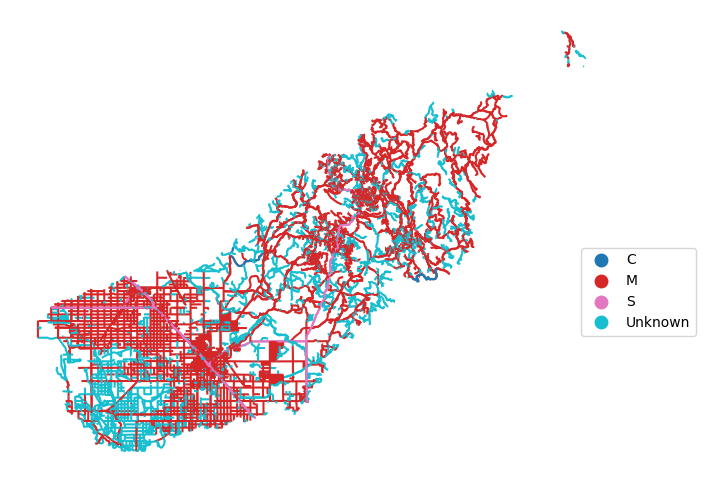

In [12]:
fig, ax = plt.subplots(figsize=(14, 6))

sjer_roads.plot(column='RTTYP',
                categorical=True,
                legend=True,
                ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))

ax.set_axis_off()

plt.show()

In [12]:
# Create a dictionary where you assign each attribute value to a particular color
roadPalette = {'M': 'blue',
               'S': 'green',
               'C': 'purple',
               'Unknown': 'grey'}
roadPalette

{'M': 'blue', 'S': 'green', 'C': 'purple', 'Unknown': 'grey'}

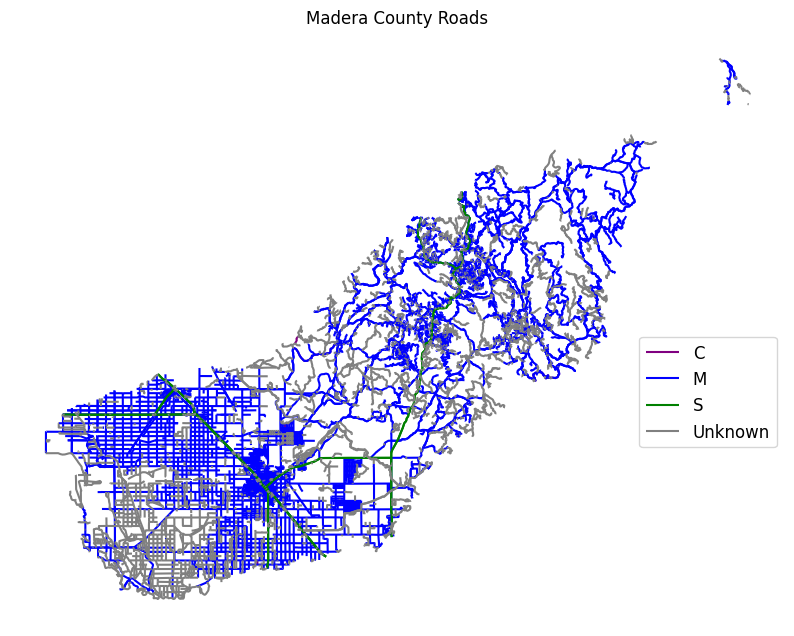

In [13]:
# Plot data
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in sjer_roads.groupby('RTTYP'):
    
    # Define the color for each group using the dictionary
    color = roadPalette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype)

ax.legend(bbox_to_anchor=(1.0, .5), prop={'size': 12})
ax.set(title='Madera County Roads')

ax.set_axis_off()
plt.show()

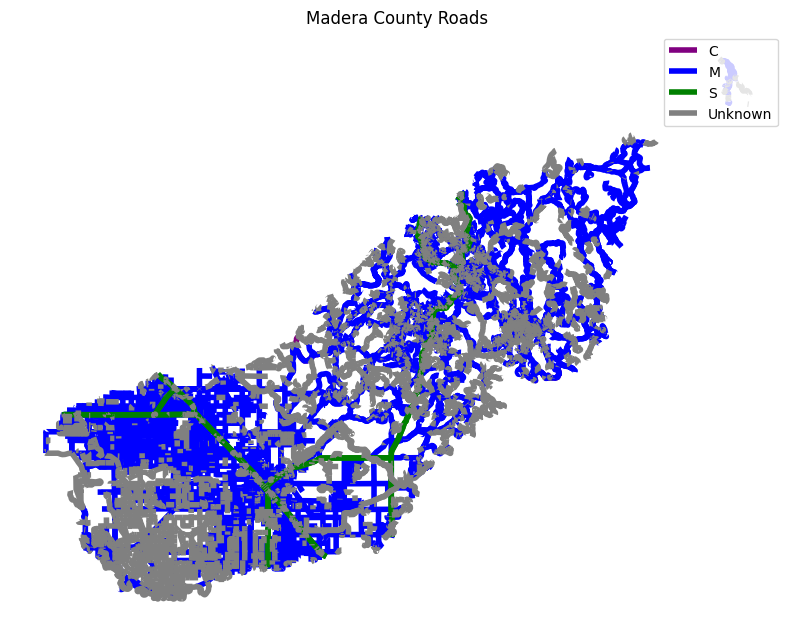

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each group (unique attribute value) in the roads layer and assign it a color
for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    data.plot(color=color,
              ax=ax,
              label=ctype,
              linewidth=4)  # Make all lines thicker

# Add title and legend to plot
ax.legend()
ax.set(title='Madera County Roads')
ax.set_axis_off()

plt.show()

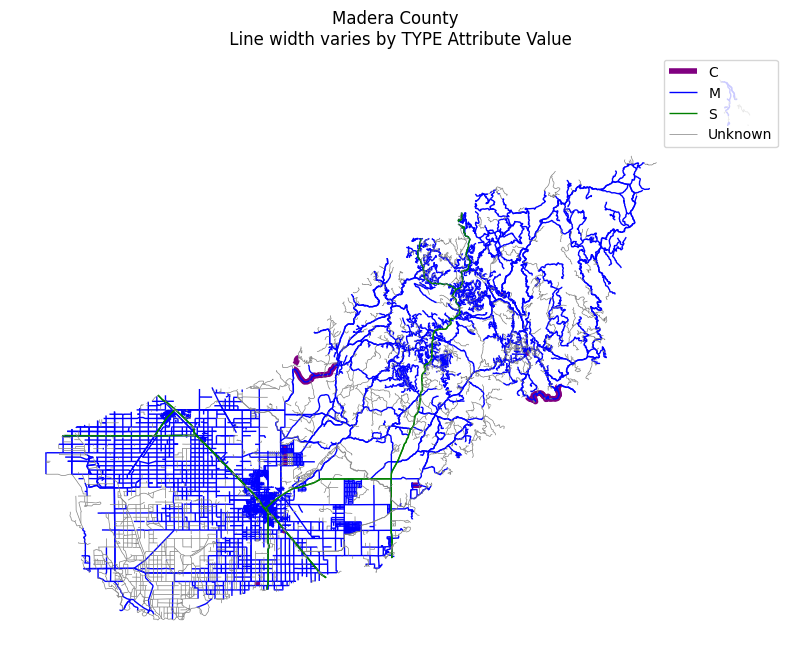

In [15]:
# Create dictionary to map each attribute value to a line width
lineWidths = {'M': 1, 'S': 1, 'C': 4, 'Unknown': .5}

# Plot data adjusting the linewidth attribute
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()

for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]    
    data.plot(color=color,
              ax=ax,
              label=ctype,
              
              # Assign each group to a line width using the dictionary created above
              linewidth=lineWidths[ctype])

ax.legend()
ax.set(title='Madera County \n Line width varies by TYPE Attribute Value')
plt.show()